# Customer Churn EDA
**Author**: Muhammad Ali Syed  
**Date**: 02/08/2025
**Purpose**: Initial data exploration for churn prediction model

## Business Context
Marketing needs to identify customers likely to churn within 30 days for retention campaigns.


In [23]:
# Industry practice: Consistent imports at the top
import sys
sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Our project modules
from src.config import RAW_DATA_PATH, RANDOM_SEED

# Configuration
pd.set_option('display.max_columns', None)
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Set random seed for reproducibility
np.random.seed(RANDOM_SEED)


## 1. Data Loading and Initial Inspection

In [24]:
# Load data with error handling
data_path = RAW_DATA_PATH / "WA_Fn-UseC_-Telco-Customer-Churn.csv"

try:
    df = pd.read_csv(data_path)
    print(f"✓ Data loaded successfully: {df.shape[0]:,} rows, {df.shape[1]} columns")
except FileNotFoundError:
    print("✗ Data file not found. Please run: python src/data_downloader.py")
    raise


✓ Data loaded successfully: 7,043 rows, 21 columns


## Data Overview

In [25]:
print("=== Data Overview ===")
print(f"Shape: {df.shape}")
print(f"\nColumn Types:\n{df.dtypes.value_counts()}")
print(f"\nTarget:\n{df['Churn'].value_counts()}")
print(f"\nTarget Distribution:\n{df['Churn'].value_counts(normalize=True)}")

=== Data Overview ===
Shape: (7043, 21)

Column Types:
object     18
int64       2
float64     1
Name: count, dtype: int64

Target:
Churn
No     5174
Yes    1869
Name: count, dtype: int64

Target Distribution:
Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


## Missing Values Analysis

In [26]:
missing = df.isnull().sum()
if missing.sum() > 0:
    print("\nColumns with missing values: ")
    print(missing[missing > 0])
print("\nNo missing values")


No missing values


## Business-Relevant Questions

In [27]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


What's the average tenure of churned vs retained customers?

In [28]:
churned_tenure = df[df['Churn'] == 'Yes']['tenure'].mean()
not_churned_tenure = df[df['Churn'] == 'No']['tenure'].mean()

print(f"\nMean tenure of churned customers: {churned_tenure:.2f}")
print(f"\nMean tenure of customers that didnt churn: {not_churned_tenure:.2f}")


Mean tenure of churned customers: 17.98

Mean tenure of customers that didnt churn: 37.57


Is there a relationship between monthly charges and churn?

In [29]:
churned_monthly_charge = df[df['Churn'] == 'Yes']['MonthlyCharges'].mean()
not_churned_monthly_charge = df[df['Churn'] == 'No']['MonthlyCharges'].mean()

print(f"\nMean Monthly charge for churned customers: {churned_monthly_charge:.2f}")
print(f"\nMean Monthly charge for not churned customers: {not_churned_monthly_charge:.2f}")


Mean Monthly charge for churned customers: 74.44

Mean Monthly charge for not churned customers: 61.27


Which services are churned customers most likely to have?

In [39]:
services_cols = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
churned_df = df[df['Churn'] == 'Yes']
not_churned_df = df[df['Churn'] == 'No']

for cols in services_cols:
    print(f"\n===== {cols} =====")
    print(f"\nChurned: {churned_df[cols].value_counts(normalize=True)} \n\nNot Churned: {not_churned_df[cols].value_counts(normalize=True)}")


===== PhoneService =====

Churned: PhoneService
Yes    0.909042
No     0.090958
Name: proportion, dtype: float64 

Not Churned: PhoneService
Yes    0.901044
No     0.098956
Name: proportion, dtype: float64

===== MultipleLines =====

Churned: MultipleLines
Yes                 0.454789
No                  0.454254
No phone service    0.090958
Name: proportion, dtype: float64 

Not Churned: MultipleLines
No                  0.491109
Yes                 0.409934
No phone service    0.098956
Name: proportion, dtype: float64

===== InternetService =====

Churned: InternetService
Fiber optic    0.693954
DSL            0.245586
No             0.060460
Name: proportion, dtype: float64 

Not Churned: InternetService
DSL            0.379204
Fiber optic    0.347700
No             0.273096
Name: proportion, dtype: float64

===== OnlineSecurity =====

Churned: OnlineSecurity
No                     0.781701
Yes                    0.157838
No internet service    0.060460
Name: proportion, dtype: flo

## Deeper tenure analysis

/var/folders/4c/4g9w277n1wb0ssy88bqbt6680000gn/T/ipykernel_72064/3409847904.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_by_tenure = df.groupby('tenure_bucket')['Churn'].apply(lambda x: (x == 'Yes').mean())


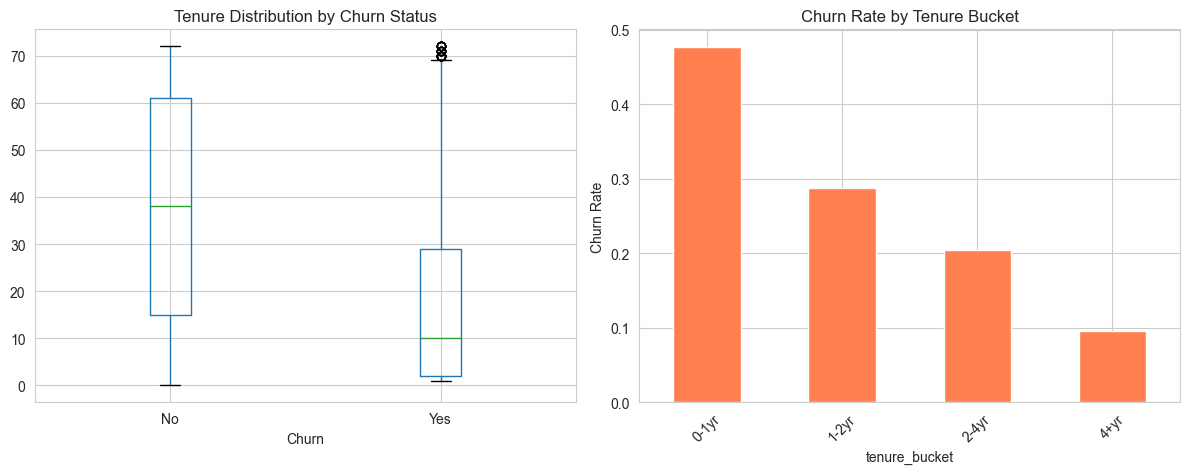

In [42]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
df.boxplot(column='tenure', by='Churn', ax=plt.gca())
plt.title('Tenure Distribution by Churn Status')
plt.suptitle('')

plt.subplot(1, 2, 2)
# churn rate by tenure buckets
df['tenure_bucket'] = pd.cut(df['tenure'], 
                             bins=[0,12,24,48,72],
                             labels=['0-1yr', '1-2yr', '2-4yr', '4+yr'])
# group the df by tenure bucket, only looking at the churn, and get mean for each group
churn_by_tenure = df.groupby('tenure_bucket')['Churn'].apply(lambda x: (x == 'Yes').mean())
churn_by_tenure.plot(kind='bar', color='coral')
plt.title('Churn Rate by Tenure Bucket')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




In [43]:
print("Business Insight: Foccus retention programs on customers approaching 12-18 month mark")

Business Insight: Foccus retention programs on customers approaching 12-18 month mark


## The "Premium but Unprotected" segment analysis

In [44]:
# Create a flag for high risk customers
df['high_risk_profile'] = (
    (df['InternetService'] == 'Fiber optic') & 
    (df['OnlineSecurity'] == 'No') & 
    (df['OnlineBackup'] == 'No') & 
    (df['DeviceProtection'] == 'No') & 
    (df['TechSupport'] == 'No')
)

risk_churn = df.groupby('high_risk_profile')['Churn'].apply(lambda x: (x == 'Yes').mean())
print("Churn rate for high risk profile: ")
print(f"High risk customers: {risk_churn[True]:.1%}")
print(f"other customers: {risk_churn[False]:.1%}")

# How many customers are high risk of churning
print(f"\nSize of high risk segment: {df['high_risk_profile'].sum()} customers ({df['high_risk_profile'].mean():.1%})")

Churn rate for high risk profile: 
High risk customers: 63.6%
other customers: 21.5%

Size of high risk segment: 848 customers (12.0%)


## Revenue impact analysis 
Calculate monthly revenue loss from churn

In [45]:
churned_revenue = df[df['Churn'] == 'Yes']['MonthlyCharges'].sum()
total_revenue = df['MonthlyCharges'].sum()
revenue_loss_pct = churned_revenue / total_revenue

print(f"Monthly revenue from churned customers: ${churned_revenue:,.2f}")
print(f"Revenue loss percentage: {revenue_loss_pct:.1%}")
print(f"Annualized revenue at risk: ${churned_revenue * 12:,.2f}")

# Which customers should we prioritize saving?
df['revenue_risk'] = df['MonthlyCharges'] * df['Churn'].map({'Yes': 1, 'No': 0})
top_risk = df.nlargest(100, 'revenue_risk')[['customerID', 'MonthlyCharges', 'tenure', 'Contract']]
print(f"\nTop 100 highest revenue risk customers represent ${top_risk['MonthlyCharges'].sum():,.2f}/month")

Monthly revenue from churned customers: $139,130.85
Revenue loss percentage: 30.5%
Annualized revenue at risk: $1,669,570.20

Top 100 highest revenue-risk customers represent $10,875.90/month
